# Lecture 6 Python packages: numpy and pandas (1)

In this class, we are going to learn two most widely used data structures, numpy and pandas. 

## if you are familar with matlab or R
### numpy is similar as matlab (array, matrix)
### pandas is similar as R (data frame)

In [3]:
# to use numpy, we need to import the numpy package
import numpy as np

# ways to create a numpy array
A = np.array([1, 2, 3.4, 5])
print(A)
print(type(A))

A = np.arange(0, 5, 1, dtype=int)
print(A)

A = np.arange(0, 5, 0.5, dtype=int)
print(A)

A = np.linspace(0, 10, 5, endpoint=False)
print(A)

A = np.zeros(10) + 9
print(A)

A = np.ones(10) * 9
print(A)

B = np.empty(10)
B[:] = np.nan
print(B)

[1.  2.  3.4 5. ]
<class 'numpy.ndarray'>
[0 1 2 3 4]
[0 0 0 0 0 0 0 0 0 0]
[0. 2. 4. 6. 8.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
[nan nan nan nan nan nan nan nan nan nan]


In [14]:
A = np.linspace(0, 10, 10, endpoint=False)
print(A)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [23]:
# create a 2D array
A = np.array([[1, 2, 3, 4, 10],
              [2, 4, 5, 6, np.nan],
              [3, 4, 5, 6, 1000],
             ])
print(A)
print(type(A))
nrow, ncol = A.shape
print(nrow)
print(ncol)
print(np.nanmean(A))
print(np.nansum(A))
print(np.nanmedian(A))
print(np.nanstd(A))

# what if there is a nan value in A?

[[   1.    2.    3.    4.   10.]
 [   2.    4.    5.    6.   nan]
 [   3.    4.    5.    6. 1000.]]
<class 'numpy.ndarray'>
3
5
75.35714285714286
1055.0
4.0
256.4587427534766


In [26]:
# index for a 2D array
A = np.array([[1, 2, 3, 4],[2, 4, 5, 6]])
print(A[0,1])
print(A[1,])
print(A[1,:])
print(A[:,2])
B = A[:,2]
B.shape

np.mean(A[:,2])

2
[2 4 5 6]
[2 4 5 6]
[3 5]


4.0

In [122]:
# math operations
A = np.linspace(0, 10, 11)
print(A)
B = A + 3
print(B)
C = A * 1.3 + 20
print(C)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
[20.  21.3 22.6 23.9 25.2 26.5 27.8 29.1 30.4 31.7 33. ]


MaunaLoaCO2_monthly.txt
[[ 1.9580000e+03  3.0000000e+00  1.9582027e+03 ...  3.1443000e+02
  -1.0000000e+00 -9.9900000e+00]
 [ 1.9580000e+03  4.0000000e+00  1.9582877e+03 ...  3.1516000e+02
  -1.0000000e+00 -9.9900000e+00]
 [ 1.9580000e+03  5.0000000e+00  1.9583699e+03 ...  3.1471000e+02
  -1.0000000e+00 -9.9900000e+00]
 ...
 [ 2.0210000e+03  1.1000000e+01  2.0218750e+03 ...  4.1707000e+02
   3.0000000e+01  3.6000000e-01]
 [ 2.0210000e+03  1.2000000e+01  2.0219583e+03 ...  4.1744000e+02
   2.8000000e+01  4.8000000e-01]
 [ 2.0220000e+03  1.0000000e+00  2.0220417e+03 ...  4.1787000e+02
   2.9000000e+01  7.5000000e-01]]


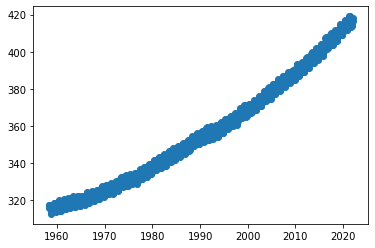

In [29]:
# load data from a txt file
fname = "MaunaLoaCO2_monthly.txt"
print(fname)
A = np.loadtxt(fname)
print(A)

import matplotlib.pyplot as plt 
plt.plot(A[:,2], A[:,3], 'o')

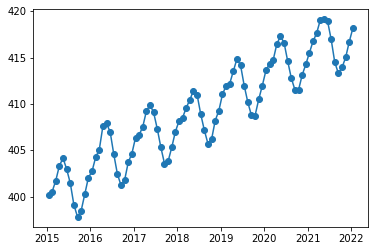

In [125]:
# subset data
fname = "MaunaLoaCO2_monthly.txt"
A = np.loadtxt(fname)
A.shape

B = A[A[:,2]>2015, :]
B.shape

import matplotlib.pyplot as plt 
plt.plot(B[:,2], B[:,3], '-o')


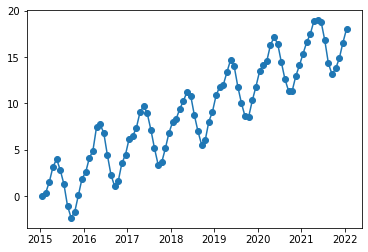

In [30]:
# subset data
fname = "MaunaLoaCO2_monthly.txt"
A = np.loadtxt(fname)
A.shape

B = A[A[:,2]>2015, :]
B.shape

import matplotlib.pyplot as plt 
plt.plot(B[:,2], B[:,3] - B[0,3], '-o')

(72, 72)


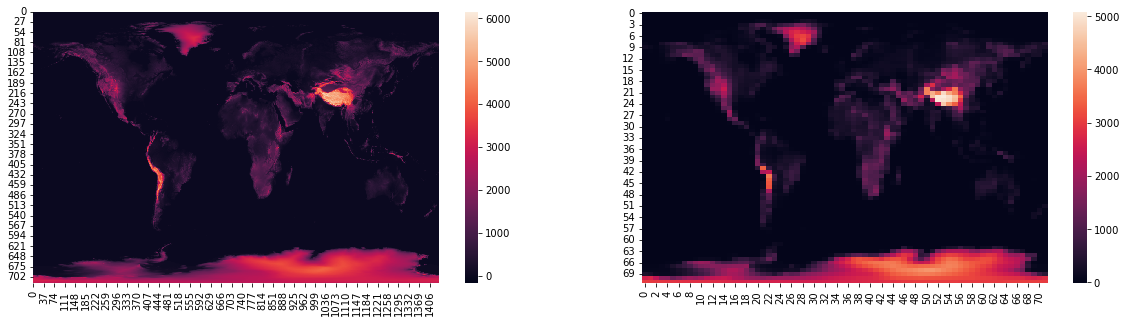

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# read a 2D dataset
fname = "globalelev.txt"
elev = np.loadtxt(fname)
nlat,nlon = elev.shape

fig, axes = plt.subplots(1,2,figsize=(20,5))

import seaborn as sns
sns.heatmap(elev, ax=axes[0])

M = 10
N = 20
newelev = np.empty([int(nlat/M),int(nlon/N)])
for i in range(0, nlat, M):
    for j in range(0, nlon, N):
        tmparr = elev[i:i+M,j:j+N]
        newelev[int(i/M),int(j/N)] = np.mean(tmparr)

import seaborn as sns
ax = sns.heatmap(newelev, ax=axes[1])  

print(newelev.shape)

In [33]:
# find the highest place in the world
x, y = np.where(elev == np.amin(elev))
Lat = np.linspace(90, -90, 720)
Lon = np.linspace(-180, 180, 1440)
print(Lat[x], Lon[y])

[31.16828929] [35.39958304]


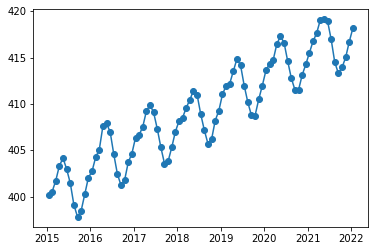

In [95]:
# read data from a csv file
fname = "MaunaLoaCO2_monthly.csv"
A = np.loadtxt(fname, delimiter=',', skiprows=1)

B = A[A[:,2]>2015, :]
B.shape

import matplotlib.pyplot as plt 
plt.plot(B[:,2], B[:,3], '-o')

In [34]:
# read data from a csv file
fname = "MaunaLoaCO2_monthly_sitename.csv"
A = np.loadtxt(fname, delimiter=',', skiprows=1)

B = A[A[:,2]>2015, :]
B.shape

import matplotlib.pyplot as plt 
plt.plot(B[:,2], B[:,3], '-o')

ValueError: could not convert string to float: 'MaunaLoa'

In [38]:
# Pandas
import pandas as pd

fname = "MaunaLoaCO2_monthly_sitename.csv"
DF = pd.read_csv(fname)

print(DF)

     Year  Month  Decimal_date  Monthly_average  deseasonalized  numofdays  \
0    1958      3     1958.2027           315.70          314.43         -1   
1    1958      4     1958.2877           317.45          315.16         -1   
2    1958      5     1958.3699           317.51          314.71         -1   
3    1958      6     1958.4548           317.24          315.14         -1   
4    1958      7     1958.5370           315.86          315.18         -1   
..    ...    ...           ...              ...             ...        ...   
762  2021      9     2021.7083           413.30          416.90         27   
763  2021     10     2021.7917           413.93          417.30         29   
764  2021     11     2021.8750           415.01          417.07         30   
765  2021     12     2021.9583           416.71          417.44         28   
766  2022      1     2022.0417           418.19          417.87         29   

     stdofdays      site  
0        -9.99  MaunaLoa  
1        

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


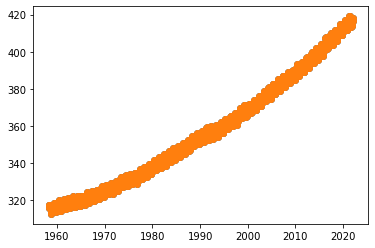

In [42]:
import matplotlib.pyplot as plt 
plt.plot(DF[["Decimal_date"]], DF[["Monthly_average"]], 'o')
plt.plot(DF["Decimal_date"], DF["Monthly_average"], 'o')
plt.plot(DF.Decimal_date, DF.Monthly_average, 'o')

# note the difference between DF[["Decimal_date"]] and DF["Decimal_date"]
print(type(DF[["Decimal_date"]]))
print(type(DF["Decimal_date"]))


1958


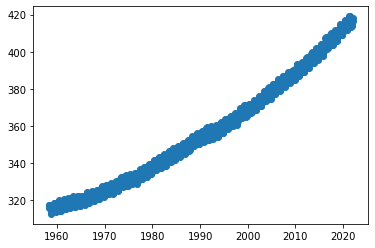

In [137]:
# Select Data Using Location Index (.iloc)
# use .iloc to select individual rows and 
# columns or a series of rows and columns 
# by providing the range (i.e. start and 
# stop locations along the rows and columns) 
# that you want to select.

print(DF.iloc[0,0])

import matplotlib.pyplot as plt 
plt.plot(DF.iloc[:, 2], DF.iloc[:, 3], 'o')

In [139]:
yi = DF.set_index("Year")
yi

,Month,Decimal_date,Monthly_average,deseasonalized,numofdays,stdofdays,site
Year,,,,,,,
1958,3,1958.2027,315.70,314.43,-1,-9.99,MaunaLoa
1958,4,1958.2877,317.45,315.16,-1,-9.99,MaunaLoa
1958,5,1958.3699,317.51,314.71,-1,-9.99,MaunaLoa
1958,6,1958.4548,317.24,315.14,-1,-9.99,MaunaLoa
1958,7,1958.5370,315.86,315.18,-1,-9.99,MaunaLoa
...,...,...,...,...,...,...,...
2021,9,2021.7083,413.30,416.90,27,0.29,MaunaLoa
2021,10,2021.7917,413.93,417.30,29,0.35,MaunaLoa
2021,11,2021.8750,415.01,417.07,30,0.36,MaunaLoa


In [175]:
yi.loc[[1958]]

,Month,Decimal_date,Monthly_average,deseasonalized,numofdays,stdofdays,site
Year,,,,,,,
1958,3,1958.2027,315.70,314.43,-1,-9.99,MaunaLoa
1958,4,1958.2877,317.45,315.16,-1,-9.99,MaunaLoa
1958,5,1958.3699,317.51,314.71,-1,-9.99,MaunaLoa
1958,6,1958.4548,317.24,315.14,-1,-9.99,MaunaLoa
1958,7,1958.5370,315.86,315.18,-1,-9.99,MaunaLoa
1958,8,1958.6219,314.93,316.18,-1,-9.99,MaunaLoa
1958,9,1958.7068,313.20,316.08,-1,-9.99,MaunaLoa
1958,10,1958.7890,312.43,315.41,-1,-9.99,MaunaLoa
1958,11,1958.8740,313.33,315.20,-1,-9.99,MaunaLoa


In [43]:
DF
DF.loc[(DF["Year"] == 1958), ["Monthly_average", "site"]]


,Monthly_average,site
0,315.70,MaunaLoa
1,317.45,MaunaLoa
2,317.51,MaunaLoa
3,317.24,MaunaLoa
4,315.86,MaunaLoa
5,314.93,MaunaLoa
6,313.20,MaunaLoa
7,312.43,MaunaLoa
8,313.33,MaunaLoa
9,314.67,MaunaLoa


# Homework 3
## A

- review https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/

## B
 - Import the Mauna Loa CO2 data (MaunaLoaCO2_monthly_sitename.csv) used in Class as a pandas data frame. (2 pt)
 - Create a new data frame with columns "Year", "annual_average", "deseasonalized_annual_average", "std_of_months" (1 pt)
 - exclude the years of 1958 and 2022 (1 pt)
 - exclude the years in which "numofdays" or "stdofdays" are filled values (e.g., negative values) (1 pt)
 -  Calculate the annual average CO2 concentration from the "Monthly_average" values, and store it in the column of "annual_average" (1 pt)
 -  Calculate the annual average deseasonalized CO2 concentration from the "deseasonalized" values, and store it in the column of "deseasonalized_annual_average" (1 pt)
 - caculate the standard deviation of the 12-month values for each year and put it into the column of "std_of_months" (1 pt)
 - Detailed comments (2 pt)
 - save the new data frame into a csv file named as YourLastName_MaunaLoaCO2_annual_Hw3.csv
 - push your code and the saved csv file to your private github repo as last time.

### Hint: google is your friend if you don't know how to carry out the required manipulations
  


1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
Empty DataFrame
Columns: [Year, annual_average, deseasonalized_annual_average, std_of_months]
Index: []
